<a href="https://colab.research.google.com/github/eemim/data-analytics_hw/blob/main/Tehtava01(Titanic%26Kunnat).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic

In [ ]:
# Tuodaan datapaketti
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/data

Mounted at /gdrive
/gdrive/MyDrive/data


In [ ]:
# Ja kirjastot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

In [ ]:
# Haetaan Titanicin matkustajaluettelo datapaketista ja testataan toimivuus
df = pd.read_excel('titanic.xlsx')
df.head()



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Matkustajien sukupuolijakauma

In [ ]:
# Tarkastellaan ensiksi miesten ja naisten osuutta matkustajista frekvenssitaulukolla
df_osuus = pd.crosstab(df['sex'], 'f')

suomeksi = ['naisia', 'miehiä']

df_osuus.columns.name=''

df_osuus.index = suomeksi


# Lisätään myös prosenttiosuudet ja Yhteensä-sarake
n = df_osuus['f'].sum()
df_osuus['%'] = df_osuus['f']/n*100

df_osuus.loc['Yhteensä'] = df_osuus.sum()

''' Voidaan tarkastaa myös rivien määrä, jotta huomataan jos yhteenlasketuissa
 tuloksissa on tyhjiä rivejä (antaa tuloksen 1309)'''
kaikki = len(df.index)
# kaikki

# Siivotaan sopivaksi
df_osuus.style.format({'f': '{:.0f}', '%': '{:.1f} %'})

,f,%
naisia,466,35.6 %
miehiä,843,64.4 %
Yhteensä,1309,100.0 %


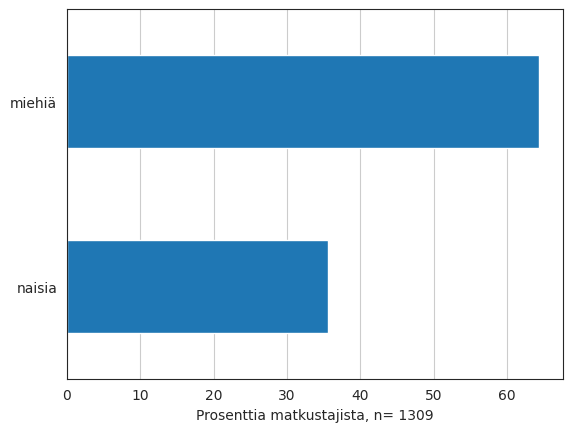

In [ ]:
# Voidaan luoda myös palkkikaavio frekvenssitalukosta

df_palkki = df_osuus.drop('Yhteensä')

df_palkki['%'].plot(kind='barh')

plt.xlabel(f'Prosenttia matkustajista, n= {n}')
plt.grid(axis='x')

## Matkustajien ikäjakauma(t)

In [ ]:
# Tarkastellaan seuraavaksi matkustajien ikäjakaumaa
df_ikajakauma = df[['age']].describe()
df_ikajakauma

,age
count,1046.000000
mean,29.881135
std,14.413500
min,0.166700
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


In [ ]:
# Suomennetaan ja siistitään
df_ikajakauma = df_ikajakauma.rename(columns={'age': 'ikä'})
tunnusluvut = ['lukumäärä', 'keskiarvo', 'keskihajonta', 'pienin', 'alaneljännes', 'mediaani', 'yläneljännes', 'suurin']
df_ikajakauma.index = tunnusluvut

df_ikajakauma2 = df_ikajakauma.T

tyyli = {'lukumäärä': '{:.0f}', 'keskiarvo': '{:.1f}', 'keskihajonta': '{:.1f}',
         'pienin': '{:.1f}', 'alaneljännes': '{:.1f}', 'mediaani': '{:.1f}', 'yläneljännes': '{:.1f}', 'suurin': '{:.1f}'}


df_ikajakauma2.style.format(tyyli)


,lukumäärä,keskiarvo,keskihajonta,pienin,alaneljännes,mediaani,yläneljännes,suurin
ikä,1046,29.9,14.4,0.2,21.0,28.0,39.0,80.0


Text(0.5, 0, 'Matkustajien ikä, n = 1046')

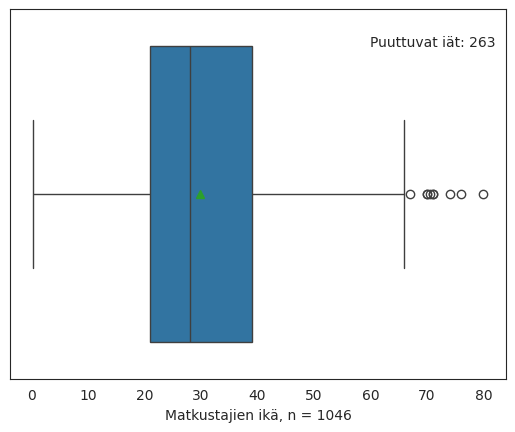

In [ ]:
# Luodaan laatikkojanakuvio ikäjakaumasta
sns.boxplot(x=df['age'], showmeans=True)
n = df['age'].count()

# Merkitään myös tilastoinnista puuttuvat ikä-merkinnät
puuttuvat = kaikki - n
plt.text(60, -0.4, f'Puuttuvat iät: {puuttuvat}', fontsize=10)

#plt.xlim([0, 90]) - jätetäänkin pois sillä pienin arvo niin lähellä nollaa

plt.xlabel(f'Matkustajien ikä, n = {n}')


In [ ]:
# Verrataan seuraavaksi miesten ja naisten ikäjakaumaa
df_jakaumat = df.groupby('sex')['age'].describe()
df_jakaumat

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,388.0,28.687071,14.576995,0.1667,19.0,27.0,38.0,76.0
male,658.0,30.585233,14.280571,0.3333,21.0,28.0,39.0,80.0


In [ ]:
df_jakaumat = df_jakaumat.rename(columns={'count': 'lukumäärä', 'mean': 'keskiarvo', 'std': 'keskihajonta', 'min': 'pienin', '25%': 'alaneljännes', '50%': 'mediaani', '75%': 'yläneljännes', 'max': 'suurin'})
df_jakaumat.index = suomeksi
df_jakaumat.style.format(tyyli)

,lukumäärä,keskiarvo,keskihajonta,pienin,alaneljännes,mediaani,yläneljännes,suurin
naisia,388,28.7,14.6,0.2,19.0,27.0,38.0,76.0
miehiä,658,30.6,14.3,0.3,21.0,28.0,39.0,80.0


Text(0.5, 1.0, 'Ikäjakauma sukupuolen mukaan, n = 1046')

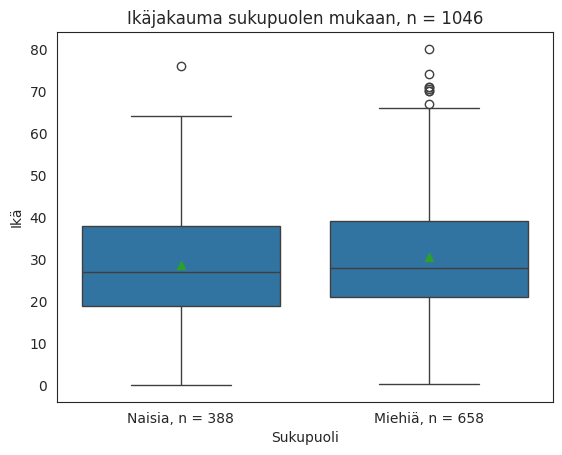

In [ ]:
# Muodostetaan laatikkojanakuviot
sns.boxplot(x=df['sex'], y=df['age'], showmeans=True)

n_miehia = df_jakaumat.loc['miehiä', 'lukumäärä']
n_naisia = df_jakaumat.loc['naisia', 'lukumäärä']
n = df_jakaumat['lukumäärä'].sum()

plt.xticks(ticks=[0, 1], labels=[f'Naisia, n = {n_naisia:.0f}', f'Miehiä, n = {n_miehia:.0f}'])
plt.xlabel('Sukupuoli')
plt.ylabel('Ikä')
plt.title(f'Ikäjakauma sukupuolen mukaan, n = {n:.0f}')

Ikäjakaumissa naisten ja miesten välillä ei ollut havaittavissa huomattavia eroja. Toki puuttuvia ikämerkintöjä (263) löytyi suurimmaksi osin miespuolisilta matkustajilta, jos lukuja verrataan alussa laskettuun sukupuolijakaumaan. Tämä tosin luultavasti on selitettävissä sukupuolijakauman erolla, sillä miehiä laivalla on yli puolitoistakertainen määrä.

## Kuolemat

In [ ]:
# Tutkitaan ensiksi kuolemia sukupuolijakauman mukaan

# Yhdistetään sarakkeet kuolleisuudesta ja sukupuolista
df_matkustajat = pd.crosstab(df['sex'], df['survived'])

df_matkustajat = df_matkustajat.rename(columns={0: 'Kuolleita', 1: 'Selviytyneitä'})

df_matkustajat.columns.name=''
df_matkustajat.index=suomeksi

# Ja luodaan "Yhteensä"-taulukointi
df_matkustajat.loc['Yhteensä'] = df_matkustajat.sum()
df_matkustajat['Yhteensä'] = df_matkustajat.sum(axis=1)

# Lisätään prosentit
df_matkustajat['Kuolleisuus %'] = (df_matkustajat['Kuolleita'] / df_matkustajat['Yhteensä']) * 100

df_matkustajat.style.format({'Kuolleisuus %': '{:.1f} %'})

,Kuolleita,Selviytyneitä,Yhteensä,Kuolleisuus %
naisia,127,339,466,27.3 %
miehiä,682,161,843,80.9 %
Yhteensä,809,500,1309,61.8 %


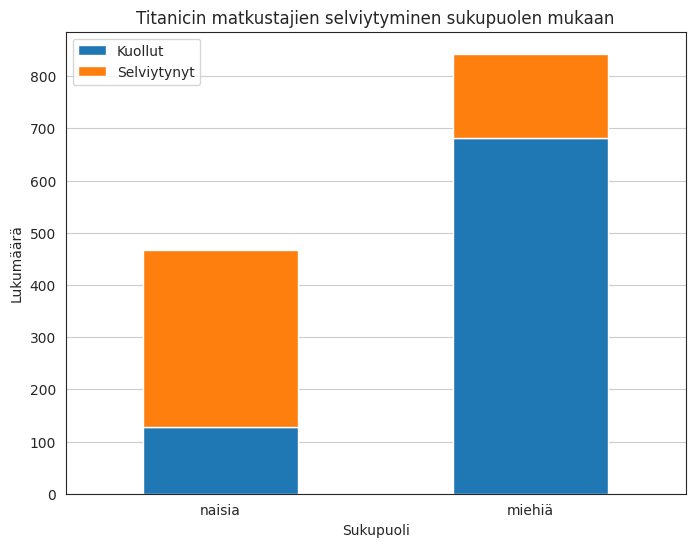

In [ ]:
df_kaavio = df_matkustajat.drop('Yhteensä')

df_kaavio[['Kuolleita', 'Selviytyneitä']].plot(kind='bar', stacked=True, figsize=(8, 6))

plt.xlabel('Sukupuoli')
plt.ylabel('Lukumäärä')
plt.title('Titanicin matkustajien selviytyminen sukupuolen mukaan')
plt.grid(axis='y')
plt.xticks(rotation=0)

plt.legend(['Kuollut', 'Selviytynyt'], loc='upper left')


Kuten taulukosta sekä kaaviosta huomataan, on miesten kuolleisuus Titanicilla ollut huomattavan paljon suurempi kuin naisten. Luultavasti vanha sääntö "naiset ja lapset ensin" on toteutunut hyvin myös käytännössä.

In [ ]:
# Tutkitaankin seuraavaksi iän vaikutusta selviämistilastoissa
rajat = [0, 6, 12, 18, 24, 30, 40, 50, 60, 70, 80, 90 ]
df['ikäluokka'] = pd.cut(df['age'], rajat, right=False)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,ikäluokka
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO","[24, 30)"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON","[0, 6)"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","[0, 6)"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON","[30, 40)"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","[24, 30)"


In [ ]:
# Edetään samalla periaattella kuin sukupuolen kanssa
df_ianmerkitys= pd.crosstab(df['ikäluokka'], df['survived'])
df_ianmerkitys = df_ianmerkitys.rename(columns={0: 'Kuolleita', 1: 'Selviytyneitä'})

df_ianmerkitys.columns.name=''
df_ianmerkitys['Yhteensä'] = df_ianmerkitys.sum(axis=1)

df_ianmerkitys['Kuolleisuus %'] = (df_ianmerkitys['Kuolleita'] / df_ianmerkitys['Yhteensä']) * 100

df_ianmerkitys.style.format({'Kuolleisuus %': '{:.1f} %'})


,Kuolleita,Selviytyneitä,Yhteensä,Kuolleisuus %
ikäluokka,,,,
"[0, 6)",19,37,56,33.9 %
"[6, 12)",21,14,35,60.0 %
"[12, 18)",33,30,63,52.4 %
"[18, 24)",133,74,207,64.3 %
"[24, 30)",130,78,208,62.5 %
"[30, 40)",134,98,232,57.8 %
"[40, 50)",83,52,135,61.5 %
"[50, 60)",38,32,70,54.3 %
"[60, 70)",22,10,32,68.8 %


Taulukosta voidaan havaita, että prosentuaalisesti kuolleisuus pyörii melko samalla alueella ikähaarukalla 6-70. Tähän tietenkin vaikuttaa ikäluokan koko, joten tutkitaan määrää vielä kaaviolla

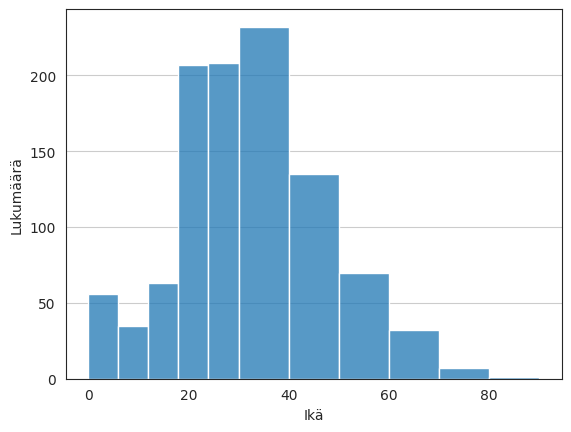

In [ ]:
sns.histplot(df['age'], bins=rajat)

plt.xlabel('Ikä')
plt.ylabel('Lukumäärä')
plt.grid(axis='y')

Huomataankin, että lukumäärällinen kuolleisuus on korkeimmilaan ikäryhmien 20-40 välillä. Nykypäivän termeillä siis kuolleisuus on ollut suurinta nuorten aikuisten ja aikuisten keskuudessa.

In [ ]:
# Seuraavaksi katsotaan matkustusluokan vaikutus selviämiseen
df_luokanmerkitys = pd.crosstab(df['pclass'], df['survived'])
luokat = ['1.luokka', '2.luokka', '3.luokka']

df_luokanmerkitys = df_luokanmerkitys.rename(columns={0: 'Kuolleita', 1: 'Selviytyneitä'})
df_luokanmerkitys.index = luokat
df_luokanmerkitys.columns.name=''
df_luokanmerkitys['Yhteensä'] = df_luokanmerkitys.sum(axis=1)

df_luokanmerkitys['Kuolleisuus %'] = (df_luokanmerkitys['Kuolleita'] / df_luokanmerkitys['Yhteensä']) * 100

df_luokanmerkitys.style.format({'Kuolleisuus %': '{:.1f} %'})

,Kuolleita,Selviytyneitä,Yhteensä,Kuolleisuus %
1.luokka,123,200,323,38.1 %
2.luokka,158,119,277,57.0 %
3.luokka,528,181,709,74.5 %


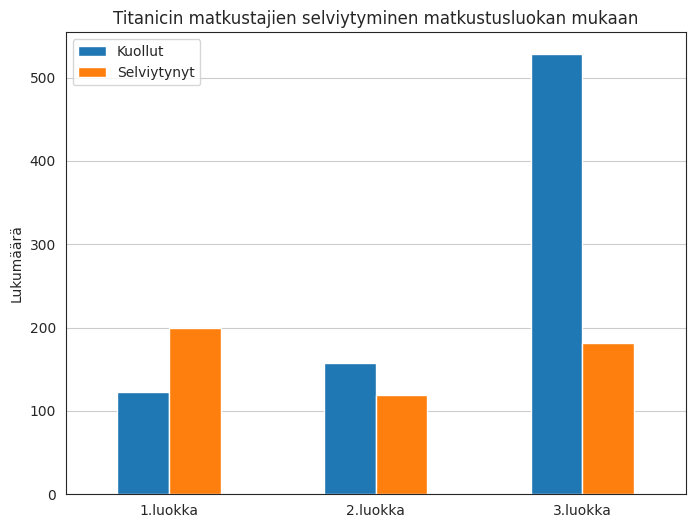

In [ ]:


df_luokanmerkitys[['Kuolleita', 'Selviytyneitä']].plot(kind='bar',  figsize=(8, 6))

plt.ylabel('Lukumäärä')
plt.title('Titanicin matkustajien selviytyminen matkustusluokan mukaan')
plt.grid(axis='y')
plt.xticks(rotation=0)

plt.legend(['Kuollut', 'Selviytynyt'], loc='upper left')

Huomataan, että luokan aletessa kuolleisuus nousi niin prosentuaalisesti kuin määrällisesti


# Kunnat

In [ ]:
df2 = pd.read_excel('kunnat.xlsx')
df2

,Unnamed: 0,"Taajama-aste, %, 2020","Väkiluku, 2021","Väkiluvun muutos edellisestä vuodesta, %, 2021","Alle 15-vuotiaiden osuus väestöstä, %, 2021","15-64 -vuotiaiden osuus väestöstä, %, 2021","Yli 64-vuotiaiden osuus väestöstä, %, 2021","Ruotsinkielisten osuus väestöstä, %, 2021","Ulkomaan kansalaisten osuus väestöstä, %, 2021","Syntyneiden enemmyys, henkilöä, 2021",...,"Alueella olevien työpaikkojen lukumäärä, 2020","Alkutuotannon työpaikkojen osuus, %, 2020","Jalostuksen työpaikkojen osuus, %, 2020","Palvelujen työpaikkojen osuus, %, 2020","Työpaikkaomavaraisuus, 2020","Vuosikate, euroa/asukas, 2020","Lainakanta, euroa/asukas, 2020","Konsernin lainakanta, euroa/asukas, 2020","Opetus- ja kulttuuritoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020","Sosiaali- ja terveystoiminta yhteensä, nettokäyttökustannukset, euroa/asukas, 2020"
0,Akaa,87.9,16467,0.5,16.3,58.9,24.8,0.2,1.9,-15,...,4432,3.1,33.8,61.4,67.4,1066.9,3199.6,4623.2,1801.7,3252.7
1,Alajärvi,61.6,9311,-1.1,16.9,53.5,29.5,0.1,2.7,-45,...,3302,11.5,27.2,59.4,100.0,599.7,2942.5,5437.3,2322.5,4142.8
2,Alavieska,51.6,2491,-1.0,19.4,54.9,25.7,0.2,0.6,-6,...,704,22.4,21.3,54.4,72.1,783.1,3973.0,4469.2,2028.2,4153.8
3,Alavus,60.8,11197,-1.2,16.4,53.9,29.7,0.1,1.3,-70,...,4056,9.0,21.0,68.5,96.4,456.8,4029.7,7135.7,1990.8,4354.0
4,Asikkala,65.0,8033,-0.3,13.3,52.4,34.3,0.2,1.9,-72,...,2282,8.6,30.7,57.9,79.5,1072.8,241.3,1623.5,1752.7,3559.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Ylivieska,85.9,15357,0.3,20.8,58.2,21.0,0.3,1.1,34,...,6587,2.4,21.1,75.5,106.5,734.0,7927.1,8720.0,2584.2,3672.5
305,Ylöjärvi,88.7,33533,0.5,20.5,60.5,19.0,0.3,1.4,130,...,9714,2.3,28.8,67.1,66.8,526.0,2463.4,3498.5,2266.7,2951.1
306,Ypäjä,41.1,2282,-1.4,11.6,58.5,29.9,0.7,1.1,-14,...,595,19.8,15.6,60.5,61.8,855.2,1506.1,2228.2,1569.6,3297.8
307,Ähtäri,61.9,5484,-0.7,13.4,52.4,34.2,0.1,1.2,-52,...,2029,10.7,25.2,62.5,101.1,586.6,3621.9,9556.5,1544.0,4759.7


Lähdetään sumplimaan numeroviidakon läpi, jos sieltä löytyisi vaikka jotain mielenkiintoista

In [ ]:
# Tutkitaan ensin esimerkiksi kymmenen väkiluvultaan suurimman kaupungin väkiluvun muutosta edellisvuoteen verrattuna
df_vakiluvut = df2.sort_values(by='Väkiluku, 2021', ascending=False)
df_suurimmat = df_vakiluvut[['Väkiluku, 2021', 'Väkiluvun muutos edellisestä vuodesta, %, 2021' ]].copy()

df_suurimmat['Väkiluku, 2020'] = df_suurimmat['Väkiluku, 2021'] / (1 + df_suurimmat['Väkiluvun muutos edellisestä vuodesta, %, 2021'] / 100)
df_suurimmat['Muutos yksikköinä'] = df_suurimmat['Väkiluku, 2021'] - df_suurimmat['Väkiluku, 2020']
df_suurimmat = df_suurimmat.rename(columns={'Väkiluvun muutos edellisestä vuodesta, %, 2021': 'Väkiluvun muutos %'})
df_suurimmat.index = df_vakiluvut['Unnamed: 0']
df_suurimmat = df_suurimmat.head(10)
df_suurimmat.index.name = None
df_suurimmat = df_suurimmat[['Väkiluku, 2020', 'Väkiluku, 2021', 'Väkiluvun muutos %', 'Muutos yksikköinä' ]]
df_suurimmat.style.format({'Väkiluku, 2020': '{:.0f}', 'Väkiluvun muutos %': '{:.1f}', 'Muutos yksikköinä': '{:.0f}'})


,"Väkiluku, 2020","Väkiluku, 2021",Väkiluvun muutos %,Muutos yksikköinä
Helsinki,657143,658457,0.2,1314
Espoo,292741,297132,1.5,4391
Tampere,241089,244223,1.3,3134
Vantaa,237308,239206,0.8,1898
Oulu,207271,209551,1.1,2280
Turku,194360,195137,0.4,777
Jyväskylä,143469,144473,0.7,1004
Kuopio,120221,121543,1.1,1322
Lahti,120027,120027,0.0,0
Pori,83649,83482,-0.2,-167


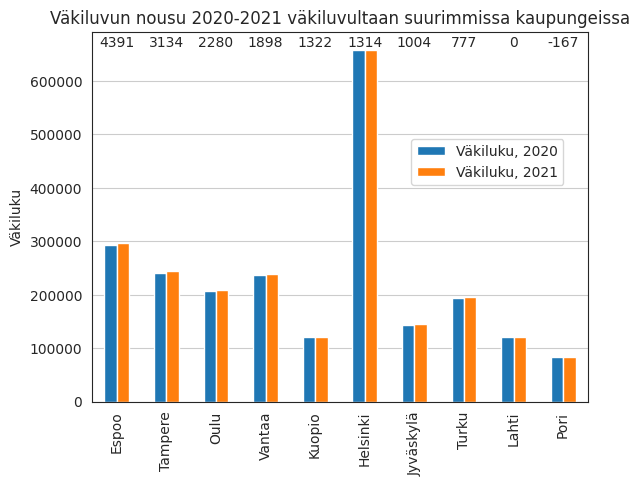

In [ ]:
# Johdetaan kaavio
df_suurimmat2 = df_suurimmat.sort_values(by='Muutos yksikköinä', ascending=False)
ax = df_suurimmat2[['Väkiluku, 2020', 'Väkiluku, 2021']].plot(kind='bar')
plt.title('Väkiluvun nousu 2020-2021 väkiluvultaan suurimmissa kaupungeissa')
plt.legend(['Väkiluku, 2020', 'Väkiluku, 2021'], bbox_to_anchor=(0.63, 0.73))
plt.ylabel('Väkiluku')

for i, val in enumerate(df_suurimmat2['Muutos yksikköinä']):
    ax.text(i, max(df_suurimmat2[['Väkiluku, 2020', 'Väkiluku, 2021']].max(axis=1)) + 5000, str(round(val)), ha='center')

plt.grid(axis='y')

Huomataan, että vaikka Helsinki asukasluvultaan on korkein, ei kasvu ole yhtä suurta kuin muissa kärkipään kaupungeissa. Esimerkiksi Espoon nousu on määrällisesti yli kolminkertainen Helsinkiin verrattuna. Kärkipäässä on ehkä hieman yllättäen myös Oulu.



Monia listalla näkyviä kaupunkeja voisi pitää niin sanottuina "opiskelukaupunkeina" ja ainakin suurimmassa osassa on korkeakoulutoimintaa. Vaikka väkiluvun muutos äskeisen kaavion perusteella pientä onkin, voisikohan väkiluvun nousu korreloida positiivisesti korkeakoulutettujen kanssa.

Text(0.5, 0, 'Väkiluvun muutos 2020-2021, %')

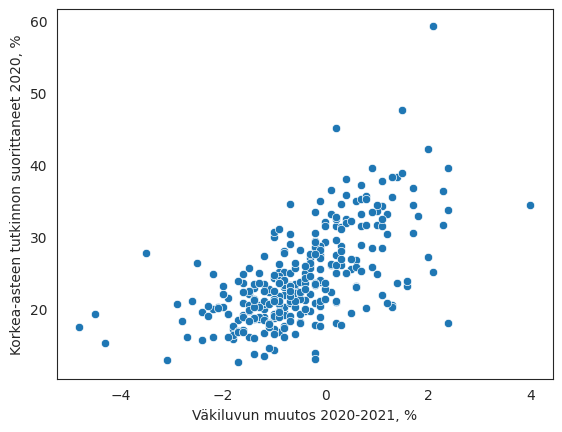

In [ ]:
# Muodostetaan hajontakuvio
sns.scatterplot(data=df2, x='Väkiluvun muutos edellisestä vuodesta, %, 2021', y='Korkea-asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2020')

plt.ylabel('Korkea-asteen tutkinnon suorittaneet 2020, %')
plt.xlabel('Väkiluvun muutos 2020-2021, %')

Huomataan, että tiettyä korrelaatiota näiden välillä on havaittavissa. Voisi siis päätellä, että väkiluvun kasvu kaupungeissa on jonkinlaista seurausta koulutusmahdollisuuksista. Toki toisessa tutkittavassa tilastossa näkyy korkea-asteen tutkinnon jo suorittaneet, mutta moni jää tutkinnon suorittamisen jälkeen opiskelukaupunkiin asumaan ja kyseisistä kunnista yleensä löytyy vastavalmistuneelle alan työpaikkoja. Tämä sitten näkyy kasvavana asukasmääränä.

Tutkitaan lisää korkeakoulutuksen vaikutusta esimerkiksi kunnan työttömien ja työllistyneiden väliseen yhteyteen. Tähän sopii data taloudellisesta huoltosuhteesta, joka kuvaa työttömien ja työvoiman ulkopuolella olevien yhteenlaskettua määrää suhteessa työllisten määrään (Tilastokeskus, s.a.).



Text(0.5, 0, 'Korkea-asteen tutkinnon suorittaneet 2020, %')

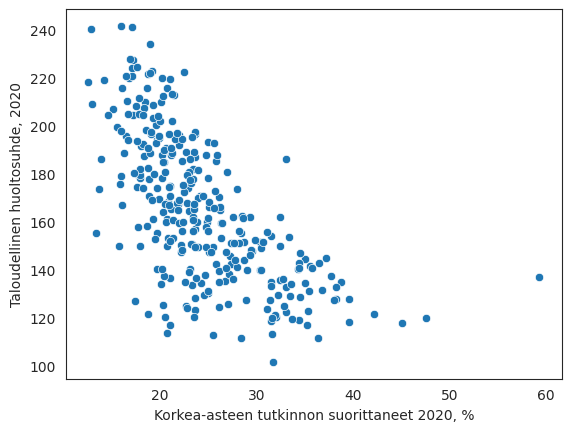

In [ ]:
sns.scatterplot(data=df2, x='Korkea-asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2020', y= 'Taloudellinen huoltosuhde, 2020')
plt.xlabel('Korkea-asteen tutkinnon suorittaneet 2020, %')

Negatiivista korrelaatiota on havaittavissa, joten voisi päätellä, että mitä suurempi osuus kunnan väestöstä on korkeakoulutettua, sitä pienempi on työttömien osuus suhteessa työllisiin.

In [ ]:
from scipy.stats import pearsonr

In [ ]:
# Vaikka korrelaatio on voimakas, voidaan sen merkitsevyys silti laskea
pearsonr(df2['Korkea-asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2020'], df2['Taloudellinen huoltosuhde, 2020'])

PearsonRResult(statistic=-0.655127546474822, pvalue=2.8910300256783076e-39)

Tässä tapauksessa tulos oli tilastollisesti merkitsevä (p<0.001), eikä sattuma ole uskottava selitys.

Aiemmin tarkasteltiin kymmentä väkiluvultaan suurinta kuntaa, josta päästiin aasinsillan kautta tutkimaan korkeakoulutuksen vaikutuksia. Tarkastellaan vielä kyseisten kaupunkien koulutusastetta.

In [ ]:
df_koulutus = df_vakiluvut.copy().head(10)

# Valitettavasti tilastoa ei yli 15-vuotiaista ole vuodelta 2020, joten käytetään tilastoa vuodelta 2021
# Oletetaan tässä tapauksessa, että koulutusprosentit eivät ole dramaattisesti heitelleet (vaikka ei ehkä saisi)
df_koulutus['Väkiluku, 2021 (yli 15-vuotiaat)'] = df_koulutus['Väkiluku, 2021'] - (df_koulutus['Väkiluku, 2021']*(df_vakiluvut['Alle 15-vuotiaiden osuus väestöstä, %, 2021']/100))
df_koulutus = df_koulutus[['Väkiluku, 2021 (yli 15-vuotiaat)', 'Vähintään toisen asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2020', 'Korkea-asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2020' ]]
df_koulutus.index = df_vakiluvut['Unnamed: 0'].head(10)
df_koulutus.index.name = None
df_koulutus = df_koulutus.rename(columns={'Vähintään toisen asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2020': 'Vähintään toisen asteen tutkinnon suorittaneet 2020, %', 'Korkea-asteen tutkinnon suorittaneiden osuus 15 vuotta täyttäneistä, %, 2020': 'Korkea-asteen tutkinnon suorittaneet 2020, %'})
tyyli = {'Väkiluku, 2021 (yli 15-vuotiaat)': '{:.0f}', 'Vähintään toisen asteen tutkinnon suorittaneet 2020, %': '{:.1f}', 'Korkea-asteen tutkinnon suorittaneet 2020, %': '{:.1f}'}

df_koulutus.style.format(tyyli)

,"Väkiluku, 2021 (yli 15-vuotiaat)","Vähintään toisen asteen tutkinnon suorittaneet 2020, %","Korkea-asteen tutkinnon suorittaneet 2020, %"
Helsinki,564298,77.0,45.1
Espoo,242460,76.6,47.6
Tampere,212230,79.8,38.3
Vantaa,198780,70.1,31.6
Oulu,173718,79.9,37.7
Turku,170745,77.2,35.8
Jyväskylä,122947,80.1,37.2
Kuopio,104162,78.9,34.3
Lahti,102983,72.5,29.3
Pori,72045,74.0,28.6


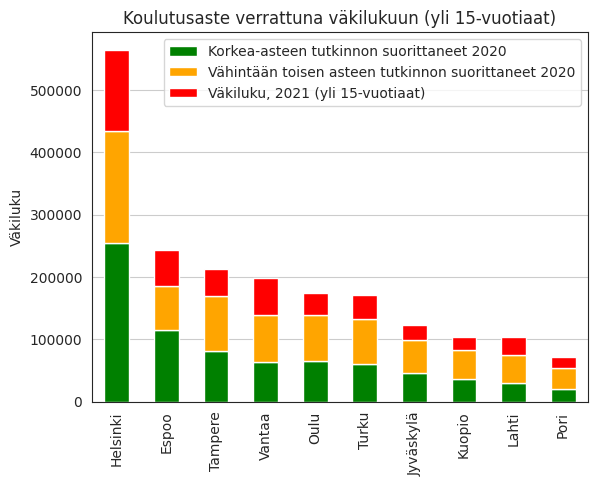

In [ ]:
df_koulutus2 = df_koulutus.copy()

df_koulutus2['Vähintään toisen asteen tutkinnon suorittaneet 2020, %'] = (df_koulutus2['Vähintään toisen asteen tutkinnon suorittaneet 2020, %'] * df_koulutus2['Väkiluku, 2021 (yli 15-vuotiaat)'])/100
df_koulutus2['Korkea-asteen tutkinnon suorittaneet 2020, %'] =  (df_koulutus2['Korkea-asteen tutkinnon suorittaneet 2020, %'] * df_koulutus2['Väkiluku, 2021 (yli 15-vuotiaat)'])/100

df_koulutus2['Korkea-asteen tutkinnon suorittaneet 2020, %'] = df_koulutus2['Korkea-asteen tutkinnon suorittaneet 2020, %']
df_koulutus2['Vähintään toisen asteen tutkinnon suorittaneet 2020, %'] = df_koulutus2['Vähintään toisen asteen tutkinnon suorittaneet 2020, %'] - df_koulutus2['Korkea-asteen tutkinnon suorittaneet 2020, %']
df_koulutus2['Väkiluku, 2021 (yli 15-vuotiaat)'] = df_koulutus2['Väkiluku, 2021 (yli 15-vuotiaat)'] - df_koulutus2['Vähintään toisen asteen tutkinnon suorittaneet 2020, %'] - df_koulutus2['Korkea-asteen tutkinnon suorittaneet 2020, %']

colors=['green', 'orange', 'red']

df_koulutus2[['Korkea-asteen tutkinnon suorittaneet 2020, %', 'Vähintään toisen asteen tutkinnon suorittaneet 2020, %', 'Väkiluku, 2021 (yli 15-vuotiaat)']].plot(kind='bar', stacked=True, color=colors)
plt.ylabel('Väkiluku')
plt.grid(axis='y')
plt.title('Koulutusaste verrattuna väkilukuun (yli 15-vuotiaat)')
plt.legend(['Korkea-asteen tutkinnon suorittaneet 2020', 'Vähintään toisen asteen tutkinnon suorittaneet 2020', 'Väkiluku, 2021 (yli 15-vuotiaat)'])
